In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import AgglomerativeClustering
import  scipy.cluster.hierarchy as sch

In [51]:
data = pd.read_csv('Mall_Customers.csv')

In [52]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [54]:
data.shape

(200, 5)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [56]:
data.describe().round()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


In [57]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]

# scipy.cluster.hierarchy : 
* It is used for drawing Dendrograms and for theoretical analysis of cluster structure.

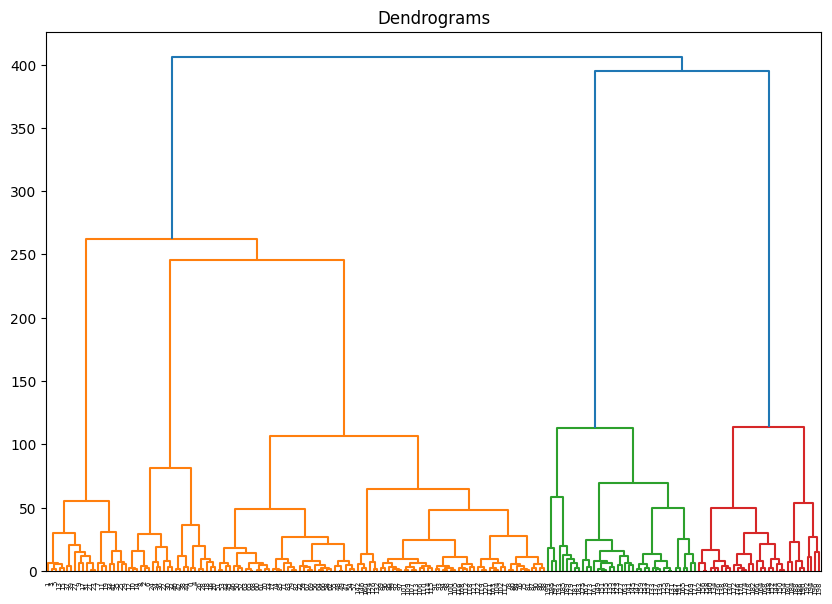

In [58]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))

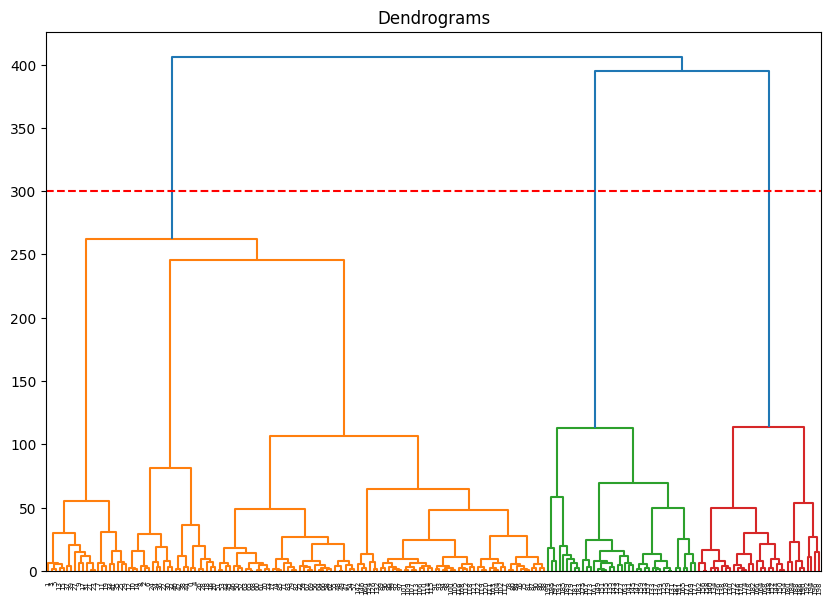

In [59]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.axhline(y=300,color='r',linestyle='--')

# AgglomerativeClustering from sklearn : 
* Used to build an actual clustering model

In [60]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')

In [61]:
hierarchical_clustering.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [62]:
data['cluster']=hierarchical_clustering.fit_predict(x)
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [63]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]

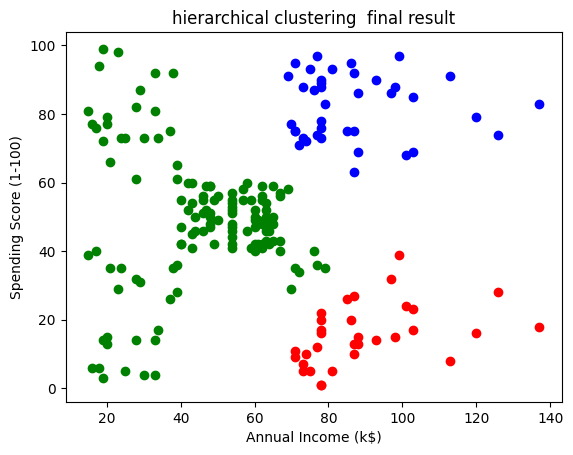

In [64]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('hierarchical clustering  final result')
plt.show()